<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/11_images_27324DR_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR1', 'DR3', 'DR2']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                         target_size=(64,64),
                                         class_mode='categorical')
validation_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                         target_size=(64,64),
                                         class_mode='categorical')
test_data = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                        target_size=(64,64),
                                        class_mode='categorical')


Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [52]:
model.fit(train_data,
          validation_data=validation_data,
          epochs=30,
          batch_size=32)
model.save('DRcnn_model.keras')

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: 0.4783 - accuracy: 0.7821 - val_loss: 0.6257 - val_accuracy: 0.5714
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 0.4932 - accuracy: 0.7692 - val_loss: 0.5892 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 0.4326 - accuracy: 0.7821 - val_loss: 0.6409 - val_accuracy: 0.7857
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 0.4113 - accuracy: 0.8205 - val_loss: 0.5862 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 0.3871 - accuracy: 0.8462 - val_loss: 0.5917 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 0.3395 - accuracy: 0.8846 - val_loss: 0.5990 - val_accuracy: 0.7143
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.3420 - accuracy: 0.8718 - val_loss: 0.6426 - val_accuracy: 0.6429
Epoch 8/30
3/3 [=========================

In [63]:
predictions = model.predict(test_data)

1/1 [==============================] - 1s 1s/step


In [64]:
y_pred = np.argmax(predictions, axis=1)

In [54]:
y_true = test_data.classes

In [65]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[1, 1, 1],
       [2, 2, 2],
       [0, 2, 3]])

In [ ]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=['DR1','DR2','DR3']))

              precision    recall  f1-score   support

         DR1       1.00      0.67      0.80         3
         DR2       0.80      0.67      0.73         6
         DR3       0.71      1.00      0.83         5

    accuracy                           0.79        14
   macro avg       0.84      0.78      0.79        14
weighted avg       0.81      0.79      0.78        14



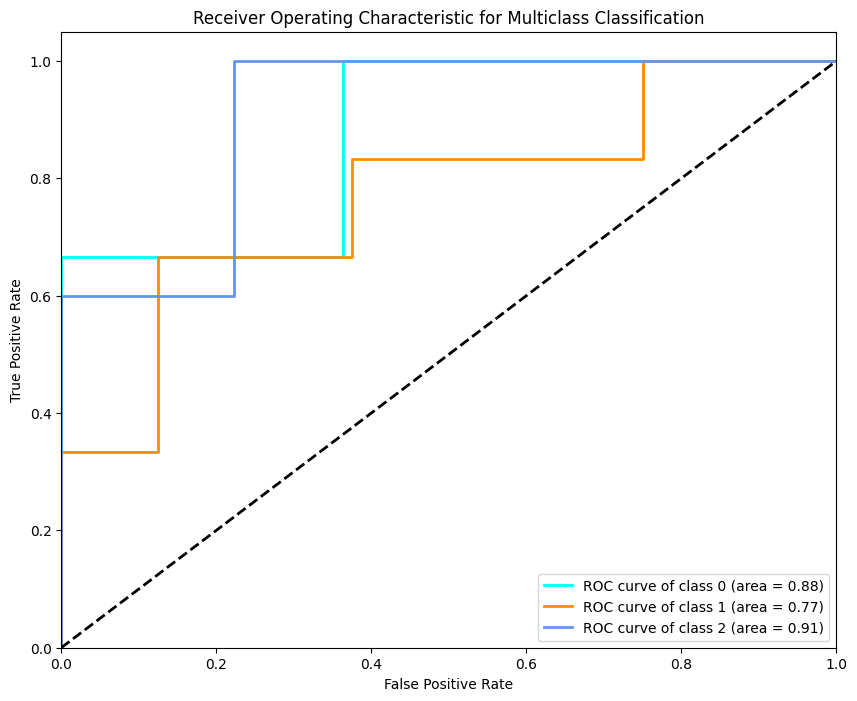

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

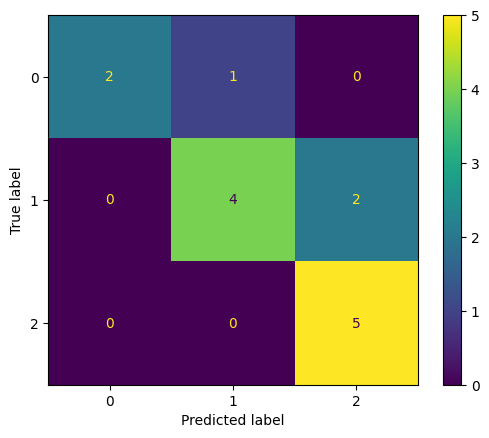

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

1/1 [==============================] - 0s 175ms/step
Prediction: DR2


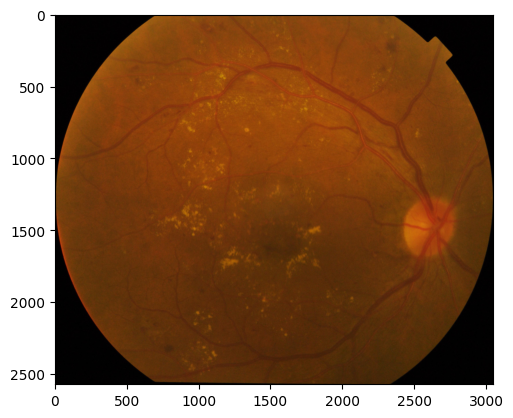

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DRcnn_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93dd-8d87-11e8-9daf-6045cb817f5b..JPG" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93dd-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 102ms/step
Prediction: DR2


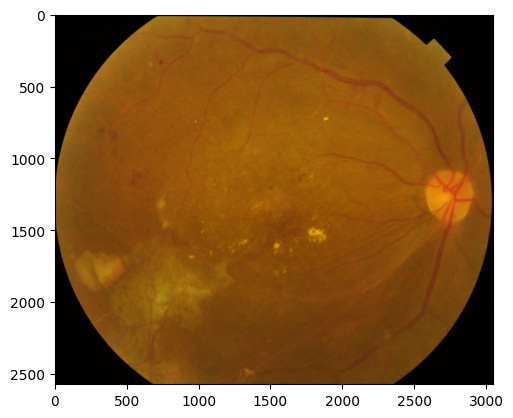

In [ ]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa92ed-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage1 = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa92ed-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage1)


1/1 [==============================] - 0s 58ms/step
Prediction: DR2


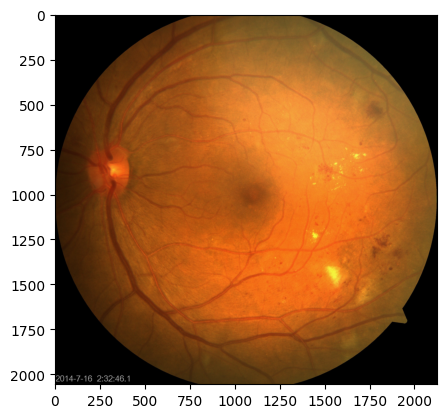

In [ ]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93ce-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)
testimage2 = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR2/1ffa93ce-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage2)


1/1 [==============================] - 0s 58ms/step
Prediction: DR1


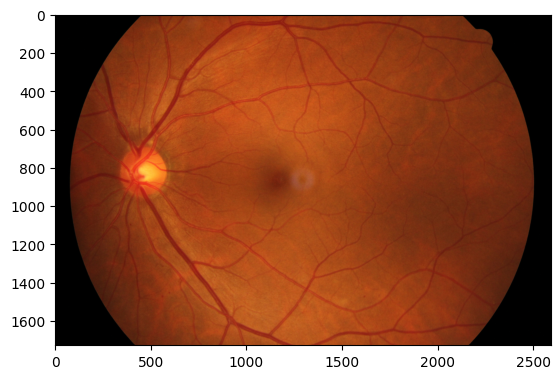

In [ ]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR1/1ffa95c2-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)
testimage = image.load_img('/content/drive/MyDrive/DR fundus images/split/test/DR1/1ffa95c2-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


In [ ]:
test_data.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2}